<a href="https://colab.research.google.com/github/ge96lip/Quantum-Computing/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
!pip install qiskit
!pip install qiskit_aer

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
from qiskit import *
from qiskit.circuit.library import QFT

In [ ]:
# Function to plot circle notation
def plot_circle_notation(statevector, n_qubits, title='Quantum State'):
    n_states = len(statevector)
    # Compute amplitude and phase
    amplitudes = np.abs(statevector)
    phases = np.angle(statevector)
    # Visualization parameters
    rows = int(np.ceil(n_states / 8.0))
    cols = min(n_states, 8)
    fig, axs = plt.subplots(rows, cols, figsize=(2*cols, 2*rows))
    axs = np.atleast_1d(axs)  # Ensure axs is iterable
    for idx in range(n_states):
        row = idx // cols
        col = idx % cols
        amp = amplitudes[idx]
        phase = phases[idx]
        # Create circles
        circleExt = patches.Circle((0.5, 0.5), 0.5, color='gray', alpha=0.1)
        circleInt = patches.Circle((0.5, 0.5), amp/2, color='b', alpha=0.3)
        ax = axs[col] if rows == 1 else axs[row, col]
        ax.add_patch(circleExt)
        ax.add_patch(circleInt)
        ax.set_aspect('equal')
        state_number = "|" + format(idx, '0' + str(n_qubits) + 'b') + ">"
        ax.set_title(state_number)
        xl = [0.5, 0.5 + 0.5 * amp * np.cos(phase + np.pi/2)]
        yl = [0.5, 0.5 + 0.5 * amp * np.sin(phase + np.pi/2)]
        ax.plot(xl, yl, 'r')
        ax.axis('off')
    plt.suptitle(title)
    plt.show()

In [50]:
def add_increment(circuit):
    circuit.ccx(0, 1, 2) # Carry the one to qubit 2, when qubits 0 and 1 are |11>
    circuit.cx(0, 1)     # Carry the one to qubit 1, when qubit 0 is |1>
    circuit.x(0)         # Add one to qubit 0

In [56]:
def add_decrement(circuit):
    """
    Applies a decrement operation to the quantum circuit.
    Subtracts 1 from a binary number represented by the qubits in the circuit.

    Args:
    circuit (QuantumCircuit): The quantum circuit on which to apply the decrement.
    """
    # Reverse the operation of carry propagation (compared to increment)
    circuit.x(0)         # Subtract one from qubit 0 (flip the qubit)
    circuit.cx(0, 1)     # Borrow from qubit 1 if qubit 0 is zero
    circuit.ccx(0, 1, 2) # Borrow from qubit 2 if qubits 0 and 1 are both zero

In [57]:
from qiskit.quantum_info import Statevector
# Create an Aer simulator
from qiskit_aer import AerSimulator

# Number of qubits
n_qubits = 3

# Create quantum circuit with 4 qubits
qc = QuantumCircuit(n_qubits)

# Initialize qubits to create superposition between |0001> and |0101>

# Set up qubits to create the superposition of |1> and |5>
qc.x(0)  # This puts qubit 0 in state |1>
qc.h(2)  # This puts qubit 2 in superposition (to affect |0101>)

v1 = Statevector(qc)

#print(np.real_if_close(v1.data))

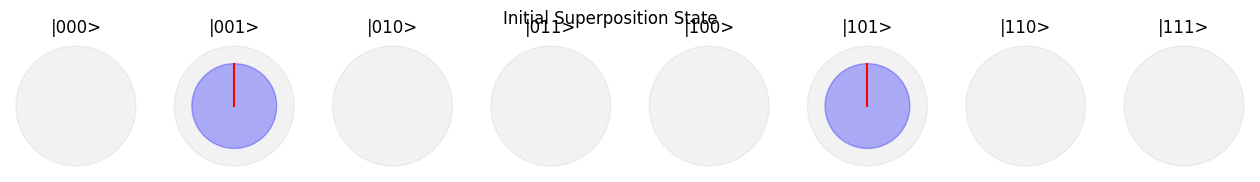

In [58]:
# Plot the quantum states using circle notation
plot_circle_notation(v1, n_qubits, title='Initial Superposition State')


In [54]:
# Increment the number encoded in the state vector
add_increment(qc)
v2 = Statevector(qc)
print(np.real_if_close(v2.data))

[0.         0.         0.70710678 0.         0.         0.
 0.70710678 0.        ]


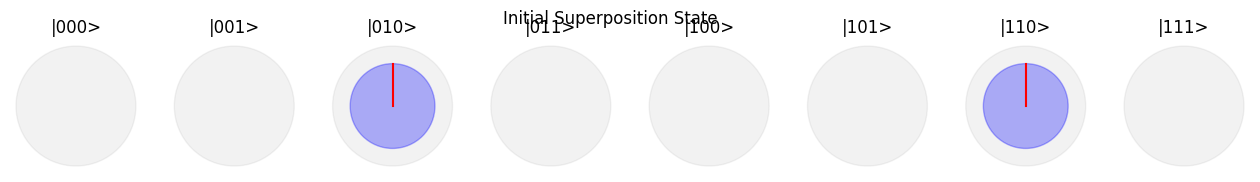

In [55]:
# Plot the quantum states using circle notation
plot_circle_notation(v2, n_qubits, title='Incremented Superposition State')

In [59]:
# Increment the number encoded in the state vector
add_decrement(qc)
v3 = Statevector(qc)
print(np.real_if_close(v3.data))

[0.70710678 0.         0.         0.         0.70710678 0.
 0.         0.        ]


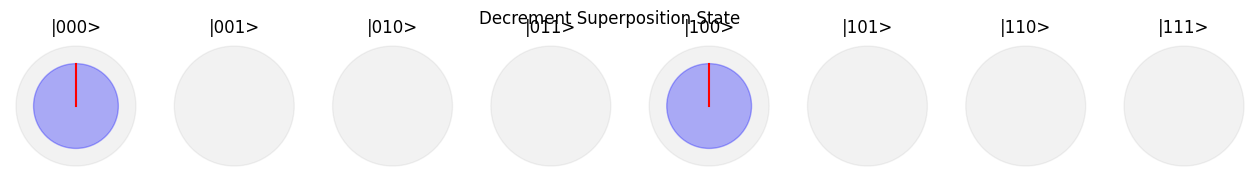

In [60]:
# Plot the quantum states using circle notation
plot_circle_notation(v3, n_qubits, title='Decrement Superposition State')

Example for an underflow

In [61]:
# Increment the number encoded in the state vector
add_decrement(qc)
v4 = Statevector(qc)
print(np.real_if_close(v4.data))

[0.         0.         0.         0.70710678 0.         0.
 0.         0.70710678]


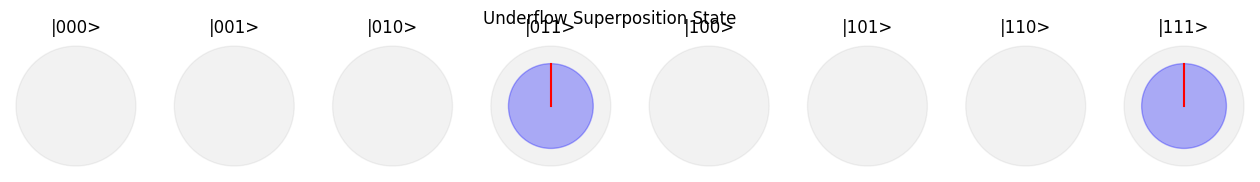

In [62]:
# Plot the quantum states using circle notation
plot_circle_notation(v4, n_qubits, title='Underflow Superposition State')

Example Overflow

In [63]:
# Increment the number encoded in the state vector
add_increment(qc)
v5 = Statevector(qc)
print(np.real_if_close(v5.data))

[0.70710678 0.         0.         0.         0.70710678 0.
 0.         0.        ]


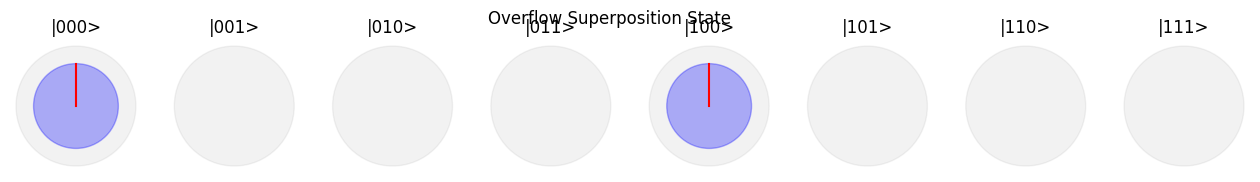

In [64]:
# Plot the quantum states using circle notation
plot_circle_notation(v5, n_qubits, title='Overflow Superposition State')

Answer: What happens if we have an overflow (for the increment) or underflow (for the decrement)?
When an increment or decrement operation is applied to a quantum state that is already at its maximum or minimum value (i.e., no further increment or decrement is possible), the operation results in the qubits wrapping around to the opposite side of the state space. For instance, in the case of overflow during an increment, the qubits reset to their lowest state, whereas in underflow during a decrement, the qubits shift to their highest possible state.

# Negative Values

Increment/Decrement on Negative Numbers: When using two’s complement representation, both increment and decrement operations will correctly handle transitions between positive and negative numbers.
Overflow and Underflow: Overflow and underflow in this system will still wrap around as in a classical system. For instance, incrementing the maximum positive number (e.g., 0111 for +7 in a 4-qubit system) will result in the minimum negative number (1000, representing -8).

Example: If you were to start with |111⟩, representing -1 in two's complement, the increment operation would move the qubits to |000⟩ (0), while the decrement operation would move the state to |110⟩, which represents -2.